##### Copyright 2018 BUPT 824zzy.

Licensed under the Apache License, Version 2.0 (the "License").

# House Price Prediction with Colabotary


This notebook first uses two modes to upload data: 
1. Download data directly from the Internet;
2. Upload data to colab. 

Then the training data is visualized and analyzed. Then the training sets are divided and compared with the traditional machine learning methods. Two predictions came out.

**Plean run in environment of Py3.6 and set configuration like this**:

![](http://ww1.sinaimg.cn/large/ca26ff18ly1fv7oe8w95yj208a07tjrk.jpg)

## Download and Prepare the dataset
The dataset of the problem is uploaded to my github. This problem is a great sample for learning regression models.

There are some packages below we will use soon.

In [98]:
# if there are some packages your don't have, please install packages in the way below
!pip install seaborn

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import seaborn as sns

%matplotlib inline 

In [100]:
# If you are not run this code in Colab. You can Download dataset from Internet
path_to_train_csv = tf.keras.utils.get_file(
    'housedata.zip', 
    origin='https://github.com/824zzy/blogResources/blob/master/zipResources/housedata.zip',
    extract=True)
path_to_test_csv = tf.keras.utils.get_file(
    'housetest.zip', 
    origin='https://github.com/824zzy/blogResources/blob/master/zipResources/housetest.zip',
    extract=True)

path_to_train = os.path.dirname(path_to_train_csv)+"/housedata.csv"
path_to_test = os.path.dirname(path_to_test_csv)+"/housetest.csv"
print("Your train dateset is downloaded to:" + path_to_train)
print("Your test dateset is downloaded to:" + path_to_test)

Your train dateset is downloaded to:/root/.keras/datasets/housedata.csv
Your test dateset is downloaded to:/root/.keras/datasets/housetest.csv


## Data Visualization

### Overview of Housedata

In [79]:
# If your are using colab, please read data directly!
# read csv via pandas and see shape and distinct observations of dataset
df_train = pd.read_csv("housedata.csv")
df_test = pd.read_csv("housetest.csv")

print("The shape of train dataset is:" + str(df_train.shape))

print("The shape of test dataset is: " + str(df_test.shape))

print("The distinct observations in train dateset is: ")
df_train.nunique()


The shape of train dataset is:(14480, 21)
The shape of test dataset is: (7133, 20)
The distinct observations in train dateset is: 


id               14406
date               364
bedrooms            12
bathrooms           29
sqft_living        843
sqft_lot          7440
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         773
sqft_basement      271
yr_built           116
yr_renovated        68
zipcode             70
lat               4658
long               696
sqft_living15      669
sqft_lot15        6764
price             3198
dtype: int64

In [80]:
# let us see some examples of our trainset
df_train.head(5)

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,2653000005,20140512T000000,4,2.75,2600,2750,1.5,0,0,3,...,1620,980,1936,0,98119,47.6413,-122.357,1960,3705,840000.0
1,1657310170,20140723T000000,3,2.50,2140,9492,2.0,0,0,3,...,2140,0,1994,0,98092,47.3289,-122.204,2180,9184,302000.0
2,2425700022,20140929T000000,4,1.75,1730,11890,1.0,0,0,2,...,980,750,1955,0,98004,47.5979,-122.194,2100,12325,425000.0
3,6181400470,20150127T000000,4,2.50,2130,4496,2.0,0,0,3,...,2130,0,2004,0,98001,47.3041,-122.280,3220,5400,215000.0
4,2206500300,20140820T000000,5,1.75,1910,9720,1.0,0,0,4,...,1390,520,1955,0,98006,47.5772,-122.159,1750,9720,565000.0


### data cleaning
There are some columns we don't want to use in any of our model so drop the "id" and  "date" columns.

In [81]:
df_train.drop(['id', 'date'], axis = 1, inplace = True)

print("The basic variable's statistical indexs in Housedata is: ")
df_train.describe()

The basic variable's statistical indexs in Housedata is: 


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,14480.000000,14480.000000,14480.000000,1.448000e+04,14480.000000,14480.000000,14480.000000,14480.000000,14480.000000,14480.000000,14480.000000,14480.000000,14480.000000,14480.000000,14480.000000,14480.000000,14480.000000,14480.000000,1.448000e+04
mean,3.367680,2.113225,2075.768439,1.505100e+04,1.499033,0.006906,0.231423,3.410152,7.653177,1786.859185,288.909254,1971.083702,82.410566,98078.223343,47.560850,-122.214365,1983.502348,12809.173412,5.377890e+05
std,0.935538,0.766134,909.091142,3.980053e+04,0.542292,0.082818,0.758018,0.651366,1.172298,826.407904,439.209514,29.387281,397.088523,53.362946,0.138598,0.140063,682.589466,27273.288544,3.569339e+05
min,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.159300,-122.519000,399.000000,651.000000,7.500000e+04
25%,3.000000,1.500000,1420.000000,5.008750e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.472200,-122.329000,1483.250000,5100.000000,3.220000e+05
50%,3.000000,2.250000,1910.000000,7.574000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.573100,-122.232000,1840.000000,7606.500000,4.500000e+05
75%,4.000000,2.500000,2550.000000,1.064050e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2200.000000,560.000000,1997.000000,0.000000,98117.000000,47.678425,-122.125000,2360.000000,10070.000000,6.400000e+05
max,33.000000,8.000000,12050.000000,1.164794e+06,3.500000,1.000000,4.000000,5.000000,13.000000,8860.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7c850f0908>,
      dtype=object)

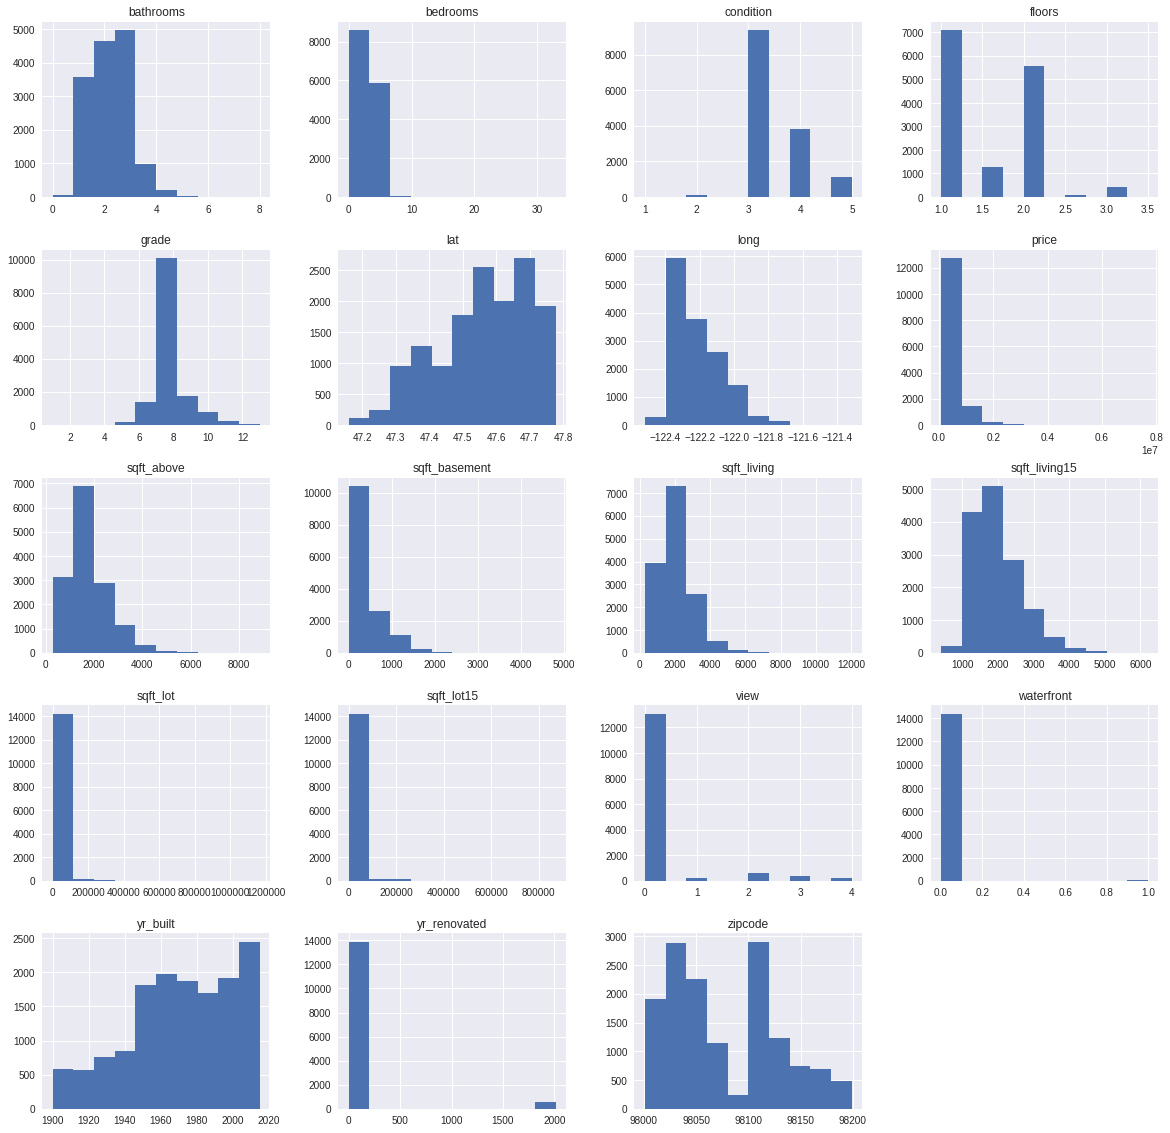

In [83]:
# visualization of train_set without `id` and `date`
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
df_train.hist(ax = ax)

### Data analysis of house prices
this section we will discover the secret of price via `seaborn`.

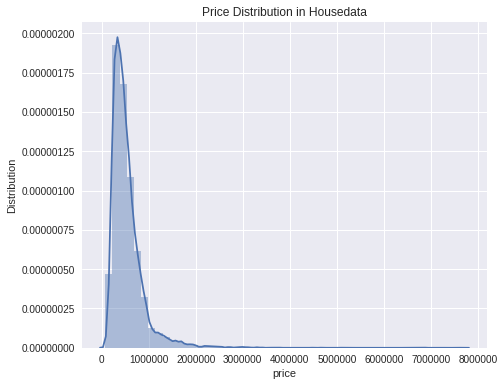

In [84]:
plt.figure(figsize = (16, 6))

plt.subplot(121)
plt.title('Price Distribution in Housedata')
plt.ylabel("Distribution")
sns.distplot(df_train['price'])

plt.show()

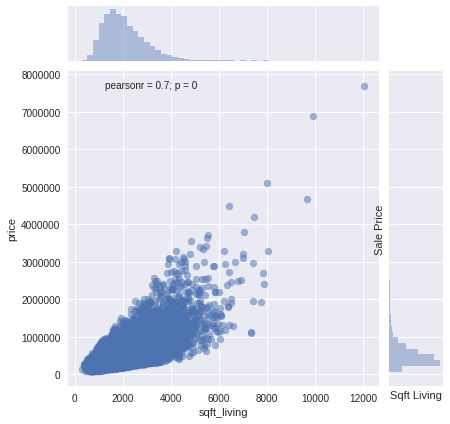

In [85]:
plt.figure(figsize = (10,5))
sns.jointplot(df_train.sqft_living, df_train.price, alpha=0.5)
plt.xlabel("Sqft Living")
plt.ylabel("Sale Price")
plt.show()

### Correlation Matrix of all variables

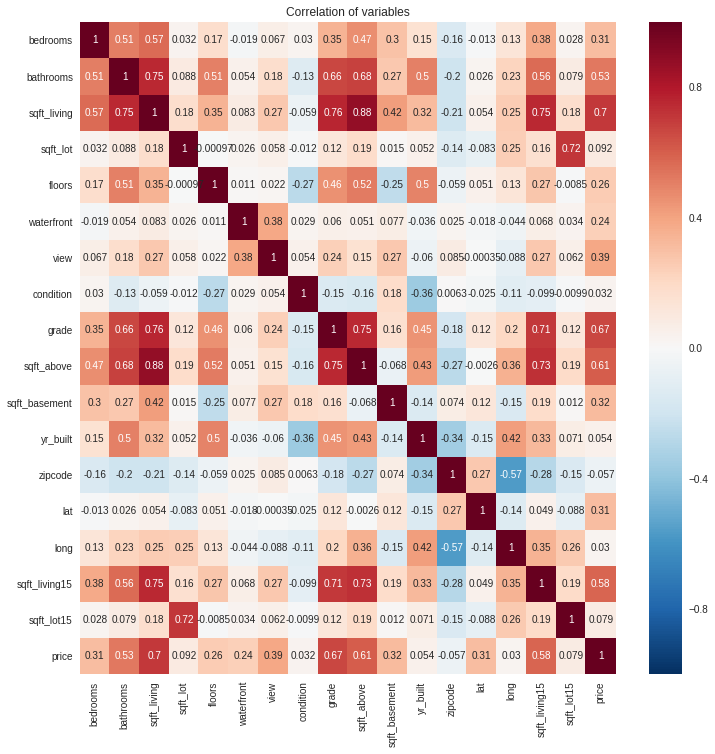

In [86]:
corr = df_train[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
                 'waterfront', 'view',
                 'condition', 'grade', 'sqft_above',
                 'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 
                 'sqft_living15', 'sqft_lot15', 'price']]

# 'bedrooms','bathrooms','sqft_living','sqft_lot','floors',
# 'condition','grade','sqft_above','sqft_basement','yr_built',
# 'zipcode','lat','long','sqft_living15','sqft_lot15','price'])

plt.figure(figsize=(12,12))
plt.title('Correlation of variables')
sns.heatmap(corr.astype(float).corr(),vmax=1.0,  annot=True)
plt.show()

## House Price Prediction using Deep Learning Model
Using Keras with Tensorflow backend.And you can use google's free GPU for accelerating! With feature engineering above, this approach will give us a great prediction.


### Preparation
First, load keras libraries

In [0]:
import keras
from keras import metrics
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam, RMSprop
from keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
from keras.utils import plot_model
from keras.models import load_model

In [0]:
# Load data and choose 16 columns for Training data and Test data
df_train = pd.DataFrame(df_train, columns=[
        'bedrooms','bathrooms','sqft_living','sqft_lot','floors', 
        'waterfront', 'view',
        'condition','grade','sqft_above','sqft_basement','yr_built',
        'zipcode','lat','long','sqft_living15','sqft_lot15','price'])

df_test = pd.DataFrame(df_test, columns=[
        'bedrooms','bathrooms','sqft_living','sqft_lot','floors',
        'waterfront', 'view',
        'condition','grade','sqft_above','sqft_basement','yr_built',
        'zipcode','lat','long','sqft_living15','sqft_lot15'])
# select column price as label
label_col = 'price'

### Split Housedata for training and validation[80% and 20%]


In [0]:
# a little function for splitting data
def train_validate_split(df, train_part=.8, validate_part=.2, seed=None):
    total_size = train_part + validate_part
    train_percent = train_part / total_size
    validate_percent = validate_part / total_size
    perm = np.random.permutation(df.index)
    m = len(df)
    train_end = int(train_percent * m)
    validate_end = int(validate_percent * m) + train_end
    train = perm[:train_end]
    validate = perm[train_end:validate_end]
    return train, validate

In [0]:
train_size, valid_size= (80, 20)
train_set, valid_set = train_validate_split(df_train, 
                              train_part=train_size, 
                              validate_part=valid_size,
                              seed=824)

In [130]:
y_train = df_train.loc[train_set, [label_col]]
x_train = df_train.loc[train_set, :].drop(label_col, axis=1)
y_valid = df_train.loc[valid_set, [label_col]]
x_valid = df_train.loc[valid_set, :].drop(label_col, axis=1)

print('Size of training set: ', len(x_train))
print('Size of validation set: ', len(x_valid))

Size of training set:  11584
Size of validation set:  2896


### Prepare data for Keras Model

In [0]:
# Function to get statistic
def norm_stats(df1, df2):
    dfs = df1.append(df2)
    minimum = np.min(dfs)
    maximum = np.max(dfs)
    mu = np.mean(dfs)
    sigma = np.std(dfs)
    return (minimum, maximum, mu, sigma)
  
# Function to Z-normalise
def z_score(col, stats):
    m, M, mu, s = stats
    df = pd.DataFrame()
    for c in col.columns:
        df[c] = (col[c]-mu[c])/s[c]
    return df

In [132]:
stats = norm_stats(x_train, x_valid)
arr_x_train = np.array(z_score(x_train, stats))
arr_y_train = np.array(y_train)
arr_x_valid = np.array(z_score(x_valid, stats))
arr_y_valid = np.array(y_valid)

stats_test = norm_stats(df_test, None)
arr_test = np.array(z_score(df_test, stats_test))

print('Training shape:', arr_x_train.shape)
print('Validation shape', arr_x_valid.shape)
print('Test shape', arr_test.shape)

print('Training samples: ', arr_x_train.shape[0])
print('Validation samples: ', arr_x_valid.shape[0])
print('Test samples', arr_test.shape[0])

Training shape: (11584, 17)
Validation shape (2896, 17)
Test shape (7133, 17)
Training samples:  11584
Validation samples:  2896
Test samples 7133


### Create Keras Model


In [0]:
def keras_model(x_size, y_size):
    t_model = Sequential()
    t_model.add(Dense(80, activation="tanh", kernel_initializer='normal', input_shape=(x_size,)))
    t_model.add(Dropout(0.2))
    t_model.add(Dense(120, activation="relu", kernel_initializer='normal', 
        kernel_regularizer=regularizers.l1(0.01), bias_regularizer=regularizers.l1(0.01)))
    t_model.add(Dropout(0.1))
    t_model.add(Dense(20, activation="relu", kernel_initializer='normal', 
        kernel_regularizer=regularizers.l1_l2(0.01), bias_regularizer=regularizers.l1_l2(0.01)))
    t_model.add(Dropout(0.1))
    t_model.add(Dense(10, activation="relu", kernel_initializer='normal'))
    t_model.add(Dropout(0.0))
    t_model.add(Dense(y_size))
    t_model.compile(
        loss='mean_squared_error',
        optimizer='nadam',
        metrics=[metrics.mae])
    return(t_model)

In [134]:
model = keras_model(arr_x_train.shape[1], arr_y_train.shape[1])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 80)                1440      
_________________________________________________________________
dropout_9 (Dropout)          (None, 80)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 120)               9720      
_________________________________________________________________
dropout_10 (Dropout)         (None, 120)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 20)                2420      
_________________________________________________________________
dropout_11 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                210       
__________

In [135]:
#Define how many epochs of training should be done and what is the batch size.
epochs = 200
batch_size = 64

print('Epochs: ', epochs)
print('Batch size: ', batch_size)

Epochs:  200
Batch size:  64


Specify Keras callbacks which allow additional functionality while the model is being fitted.

- ModelCheckpoint allows to save the models as they are being built or improved.
- TensorBoard interacts with TensorFlow interactive reporting system.
- EarlyStopping watches one of the model measurements and stops fitting when no improvement.

In [136]:
history = model.fit(arr_x_train, arr_y_train,
    batch_size=batch_size,
    epochs=epochs,
    shuffle=True,
    verbose=2,
    validation_data=(arr_x_valid, arr_y_valid),)

Train on 11584 samples, validate on 2896 samples
Epoch 1/200
 - 2s - loss: 385307830260.6851 - mean_absolute_error: 514643.3942 - val_loss: 339167152524.0221 - val_mean_absolute_error: 432971.0901
Epoch 2/200
 - 2s - loss: 161960913065.7238 - mean_absolute_error: 268055.1045 - val_loss: 138386924606.2321 - val_mean_absolute_error: 220038.7547
Epoch 3/200
 - 2s - loss: 105237050068.1547 - mean_absolute_error: 217478.3741 - val_loss: 132938626291.2707 - val_mean_absolute_error: 215080.9812
Epoch 4/200
 - 2s - loss: 101737817829.1271 - mean_absolute_error: 212497.4104 - val_loss: 130401536101.8343 - val_mean_absolute_error: 210982.9509
Epoch 5/200
 - 2s - loss: 98835267878.1879 - mean_absolute_error: 209381.5488 - val_loss: 126093999539.6243 - val_mean_absolute_error: 206584.0720
Epoch 6/200
 - 2s - loss: 93167893837.7901 - mean_absolute_error: 204212.0070 - val_loss: 119910505624.7514 - val_mean_absolute_error: 198911.1639
Epoch 7/200
 - 2s - loss: 87940202496.0000 - mean_absolute_error:

In [137]:
# Evaluate and report performance of the trained model
train_score = model.evaluate(arr_x_train, arr_y_train, verbose=0)
valid_score = model.evaluate(arr_x_valid, arr_y_valid, verbose=0)

print('Train MAE: ', round(train_score[1], 4), ', Train Loss: ', round(train_score[0], 4)) 
print('Val MAE: ', round(valid_score[1], 4), ', Val Loss: ', round(valid_score[0], 4))

Train MAE:  63375.7061 , Train Loss:  9564011682.6519
Val MAE:  73631.0404 , Val Loss:  24099634249.547


In [0]:
def plot_hist(h, xsize=6, ysize=10):
    # Prepare plotting
    fig_size = plt.rcParams["figure.figsize"]
    plt.rcParams["figure.figsize"] = [xsize, ysize]
    fig, axes = plt.subplots(nrows=4, ncols=4, sharex=True)
    
    # summarize history for MAE
    plt.subplot(211)
    plt.plot(h['mean_absolute_error'])
    plt.plot(h['val_mean_absolute_error'])
    plt.title('Training vs Validation MAE')
    plt.ylabel('MAE')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    # summarize history for loss
    plt.subplot(212)
    plt.plot(h['loss'])
    plt.plot(h['val_loss'])
    plt.title('Training vs Validation Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    # Plot it all in IPython (non-interactive)
    plt.draw()
    plt.show()

    return

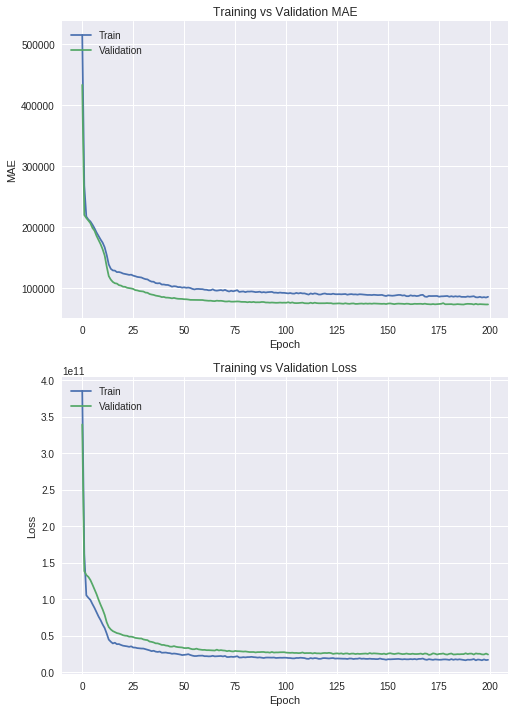

In [139]:
plot_hist(history.history, xsize=8, ysize=12)

In [140]:
# prediction of Housetest using Deep Learning
output_y = model.predict(arr_test)
print("Check out the length of prediction: " + str(len(output_y)))
for i in range(int(len(arr_test)/100)):
  print("X=%s, Prediction=%s" % (arr_test[i], output_y[i]))

Check out the length of prediction: 7133
X=[ 0.67776569  0.16977744 -0.01951417 -0.14210417  0.96286131 -0.09439752
 -0.30676091  0.9115622   0.28399028  0.33494202 -0.66057861  0.51642752
 -0.36001223 -0.86391076  0.35784861  0.57489781 -0.18218559], Prediction=[377826.2]
X=[ 1.76612738  1.13345582  0.86621902 -0.1906806  -0.90575241 -0.09439752
 -0.30676091  2.45126696  0.28399028  0.04630294  1.72099473  0.20972702
  0.69971     0.86630949 -0.50613141  0.54595434 -0.23396406], Prediction=[797397.06]
X=[ 0.67776569  0.49100357  1.79463814 -0.09718837  0.96286131 -0.09439752
  2.2479683  -0.62814256  2.82246477  2.37946885 -0.66057861  0.89128369
 -1.32677637  0.04452708  0.58964813  2.48516639 -0.1096519 ], Prediction=[1160255.4]
X=[-0.41059601  1.77590808  2.63768538 -0.01375728  0.96286131 -0.09439752
  2.2479683  -0.62814256  3.66862293  3.3295725  -0.66057861  0.65273885
 -0.80621106  1.01867864 -0.10575042  2.97720527  0.05628036], Prediction=[2483467.5]
X=[-0.41059601  0.491003

In [168]:
df_test_2 = pd.read_csv("housetest.csv")
result_list = []
for each in output_y:
  result_list.append(each[0])

predict_result = pd.DataFrame({'id':df_test_2['id'],'price':result_list})
predict_result.to_csv("submission.csv", index=False, sep=',')
submission = pd.read_csv("submission.csv")
submission

,id,price
0,2591820310,3.778262e+05
1,7974200820,7.973971e+05
2,7701450110,1.160255e+06
3,9522300010,2.483468e+06
4,9510861140,6.689695e+05
5,1761300310,2.595431e+05
6,7732410120,8.061432e+05
7,7010701383,6.081790e+05
8,291310170,4.087340e+05
9,4232901990,5.446119e+05


## House Price Prediction using different sklearn models
this section we will test how well the models in sklearn library compare to Deep Learning Model

In [0]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split # Model evaluation
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler # Preprocessing
from sklearn.linear_model import Lasso, Ridge, ElasticNet, RANSACRegressor, SGDRegressor, HuberRegressor, BayesianRidge # Linear models
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor  # Ensemble methods
from xgboost import XGBRegressor, plot_importance # XGBoost
from sklearn.svm import SVR, SVC, LinearSVC  # Support Vector Regression
from sklearn.tree import DecisionTreeRegressor # Decision Tree Regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline # Streaming pipelines
from sklearn.decomposition import KernelPCA, PCA # Dimensionality reduction
from sklearn.feature_selection import SelectFromModel # Dimensionality reduction
from sklearn.model_selection import learning_curve, validation_curve, GridSearchCV # Model evaluation
from sklearn.base import clone # Clone estimator
from sklearn.metrics import mean_absolute_error

### Selecting the most important features

In [0]:
thresh = 5 * 10**(-3)
model = XGBRegressor()
model.fit(x_train, y_train)
#select features using threshold
selection = SelectFromModel(model, threshold=thresh, prefit=True)
# train
select_X_train = selection.transform(x_train)
# eval model
select_X_val = selection.transform(x_valid)
# test 
select_X_test = selection.transform(df_test)

After selecting features, we could see variables below are remained.
- bedrooms
- bathrooms
- sqft_living
- sqft_lot
- waterfront
- view
- condition
- grade
- sqft_above
- sqft_basement
- yr_built
- zipcode
- lat
- long
- sqft_living15
- sqft_lot15

In [104]:
# samples of selected varibles
print(select_X_train[0])
print(select_X_val[0])
print(select_X_test[0])

[ 2.00000e+00  1.00000e+00  1.30000e+03  1.10800e+04  0.00000e+00
  0.00000e+00  4.00000e+00  7.00000e+00  1.30000e+03  0.00000e+00
  1.95500e+03  9.80340e+04  4.77281e+01 -1.22233e+02  1.60000e+03
  9.25900e+03]
[ 4.00000e+00  1.75000e+00  2.04000e+03  9.32200e+03  0.00000e+00
  0.00000e+00  3.00000e+00  8.00000e+00  1.44000e+03  6.00000e+02
  1.97700e+03  9.81550e+04  4.77611e+01 -1.22298e+02  1.91000e+03
  1.00260e+04]
[ 4.00000e+00  2.25000e+00  2.07000e+03  8.89300e+03  0.00000e+00
  0.00000e+00  4.00000e+00  8.00000e+00  2.07000e+03  0.00000e+00
  1.98600e+03  9.80580e+04  4.74388e+01 -1.22162e+02  2.39000e+03
  7.70000e+03]


Scaled_Ridge: 124300.093476 (+/- 4439.417505)
Scaled_Lasso: 137509.869290 (+/- 4826.521927)
Scaled_Elastic: 123196.769240 (+/- 5667.367008)
Scaled_SVR: 116798.453713 (+/- 6281.652625)
Scaled_RF_reg: 75804.055822 (+/- 5129.546476)
Scaled_ET_reg: 75293.474146 (+/- 4340.781015)
Scaled_BR_reg: 75847.642326 (+/- 5244.523696)
Scaled_Hub-Reg: 115377.171672 (+/- 5753.053611)
Scaled_BayRidge: 124254.339858 (+/- 4441.150781)
Scaled_XGB_reg: 77471.329973 (+/- 4219.310519)
Scaled_DT_reg: 101167.186979 (+/- 5360.034605)
Scaled_KNN_reg: 90053.093089 (+/- 4554.589399)
Scaled_Gboost-Reg: 77321.440679 (+/- 4289.193501)
Scaled_RFR_PCA: 140109.451130 (+/- 6132.699209)
Scaled_XGBR_PCA: 135826.128547 (+/- 5914.992782)


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


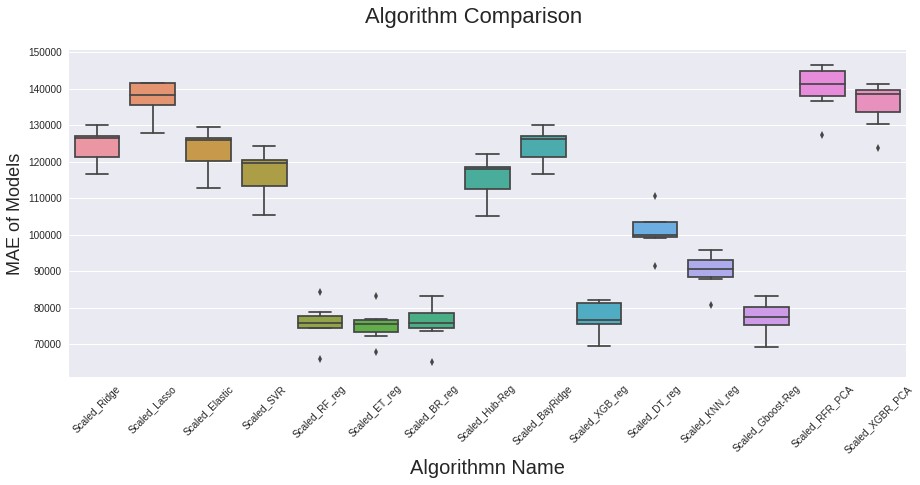

In [105]:
# pipeline with the models to we do a first evaluate of their power to this problem
pipelines = []
seed = 2

pipelines.append(
                ("Scaled_Ridge", 
                 Pipeline([
                     ("Scaler", StandardScaler()), 
                     ("Ridge", Ridge(random_state=seed, tol=10 ))
                      ]))
                )
pipelines.append(
                ("Scaled_Lasso", 
                 Pipeline([
                     ("Scaler", StandardScaler()), 
                     ("Lasso", Lasso(random_state=seed, tol=1))
                      ]))
                )
pipelines.append(
                ("Scaled_Elastic", 
                 Pipeline([
                     ("Scaler", StandardScaler()), 
                     ("Lasso", ElasticNet(random_state=seed))
                      ]))
                )

pipelines.append(
                ("Scaled_SVR",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("SVR",  SVR(kernel='linear', C=1e2, degree=5))
                 ])
                )
                )

pipelines.append(
                ("Scaled_RF_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("RF", RandomForestRegressor(random_state=seed))
                 ])
                )
                )

pipelines.append(
                ("Scaled_ET_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("ET", ExtraTreesRegressor(random_state=seed))
                 ])
                )
                )
pipelines.append(
                ("Scaled_BR_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("BR", BaggingRegressor(random_state=seed))
                 ]))) 

pipelines.append(
                ("Scaled_Hub-Reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("Hub-Reg", HuberRegressor())
                 ]))) 
pipelines.append(
                ("Scaled_BayRidge",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("BR", BayesianRidge())
                 ]))) 

pipelines.append(
                ("Scaled_XGB_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("XGBR", XGBRegressor(seed=seed))
                 ]))) 

pipelines.append(
                ("Scaled_DT_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("DT_reg", DecisionTreeRegressor())
                 ]))) 

pipelines.append(
                ("Scaled_KNN_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("KNN_reg", KNeighborsRegressor())
                 ])))

pipelines.append(
                ("Scaled_Gboost-Reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("GBoost-Reg", GradientBoostingRegressor())
                 ])))

pipelines.append(
                ("Scaled_RFR_PCA",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("PCA", PCA(n_components=3)),
                     ("XGB", RandomForestRegressor())
                 ])))

pipelines.append(
                ("Scaled_XGBR_PCA",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("PCA", PCA(n_components=3)),
                     ("XGB", XGBRegressor())
                 ])))

scoring = 'neg_mean_absolute_error'
n_folds = 7

results, names  = [], [] 

for name, model  in pipelines:
    kfold = KFold(n_splits=n_folds, random_state=seed)
    cv_results = abs(cross_val_score(model, x_train, np.ravel(y_train), cv= kfold,
                                 scoring=scoring))
    names.append(name)
    results.append(cv_results)    
    msg = "%s: %f (+/- %f)" % (name, cv_results.mean(),  cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,6))
fig.suptitle('Algorithm Comparison', fontsize=22)
ax = fig.add_subplot(111)
sns.boxplot(x=names, y=results)
ax.set_xticklabels(names)
ax.set_xlabel("Algorithmn Name", fontsize=20)
ax.set_ylabel("MAE of Models", fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()


### Testing XGB_regression and RD_regression


In [114]:
xgb = XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

xgb.fit(x_train, y_train)
y_hat = xgb.predict(x_valid)
y_predict = xgb.predict(df_test)
xgb.score(x_valid,y_valid)

0.8895075374254651

In [107]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, np.ravel(y_train))

rf_random.best_params_

# Predicting with best params
y_hat_Search = rf_random.predict(x_valid)
# y_hat_Test = rf_random.predict(arr_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=31, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV] n_estimators=31, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV]  n_estimators=31, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   0.8s
[CV] n_estimators=31, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV]  n_estimators=31, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   0.8s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=31, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   0.8s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=

[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  8.9min


[CV]  n_estimators=94, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False, total=  10.3s
[CV] n_estimators=94, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False 
[CV]  n_estimators=94, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False, total=  10.6s
[CV] n_estimators=94, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False 
[CV]  n_estimators=94, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False, total=  10.6s
[CV] n_estimators=136, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=94, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False, total=  10.5s
[CV] n_estimators=136, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=136, min_s

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 16.5min finished


In [110]:
print("\nMAE of XGBoost Regressor: {}".format(mean_absolute_error(y_hat, y_valid)))
print("MAE of RandomForest Regressor: {} ".format(mean_absolute_error(y_hat_Search, y_valid)))


MAE of XGBoost Regressor: 69279.36830973758
MAE of RandomForest Regressor: 71547.37425775436 


In [117]:
print(len(y_predict))
for index, RF_pred in enumerate(y_predict):
  print("Prediction of "+ str(index) + " is : " + str(RF_pred))

7133
Prediction of 0 is : 377358.47
Prediction of 1 is : 879015.7
Prediction of 2 is : 1145132.5
Prediction of 3 is : 2059259.8
Prediction of 4 is : 726814.75
Prediction of 5 is : 256824.89
Prediction of 6 is : 804853.2
Prediction of 7 is : 632482.06
Prediction of 8 is : 405965.16
Prediction of 9 is : 583268.94
Prediction of 10 is : 617752.2
Prediction of 11 is : 376320.56
Prediction of 12 is : 246153.47
Prediction of 13 is : 365903.6
Prediction of 14 is : 225601.52
Prediction of 15 is : 1094219.0
Prediction of 16 is : 803658.44
Prediction of 17 is : 939733.94
Prediction of 18 is : 365963.78
Prediction of 19 is : 458821.44
Prediction of 20 is : 442939.47
Prediction of 21 is : 956851.94
Prediction of 22 is : 718405.06
Prediction of 23 is : 602798.44
Prediction of 24 is : 554135.25
Prediction of 25 is : 514020.88
Prediction of 26 is : 235581.3
Prediction of 27 is : 245185.38
Prediction of 28 is : 346361.28
Prediction of 29 is : 613806.56
Prediction of 30 is : 377940.16
Prediction of 31 i

In [172]:
df_test_2 = pd.read_csv("housetest.csv")
result_list = []
for each in y_predict:
  result_list.append(each)

predict_result = pd.DataFrame({'id':df_test_2['id'],'price':result_list})
predict_result.to_csv("submission_2.csv", index=False, sep=',')
submission_2 = pd.read_csv("submission_2.csv")
submission_2

,id,price
0,2591820310,3.773585e+05
1,7974200820,8.790157e+05
2,7701450110,1.145132e+06
3,9522300010,2.059260e+06
4,9510861140,7.268148e+05
5,1761300310,2.568249e+05
6,7732410120,8.048532e+05
7,7010701383,6.324821e+05
8,291310170,4.059652e+05
9,4232901990,5.832689e+05


## Conclusion
After the above analysis, according to MAE of each model, we decided to use XGB_regression and Deeplearning versions of the answer. According to the experimental results, the results of Deeplearning model should be better than that of XGB. I really want to know whether the real situation is like this or not, looking forward to the teacher's reply!


## References
1. https://www.kaggle.com/ashishpatel26/e-mc2-tablue-visualization
1. https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
1. https://seaborn.pydata.org/generated/seaborn.distplot.html#seaborn.distplot
1. https://www.kaggle.com/kabure/predicting-house-prices-xgb-rf-bagging-reg-pipe
1. http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

There are too many references to add.

Thanks to the great works of unknown authors!

In [173]:
!ls

housedata.csv  housetest.csv  sample_data  submission_2.csv  submission.csv
